In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

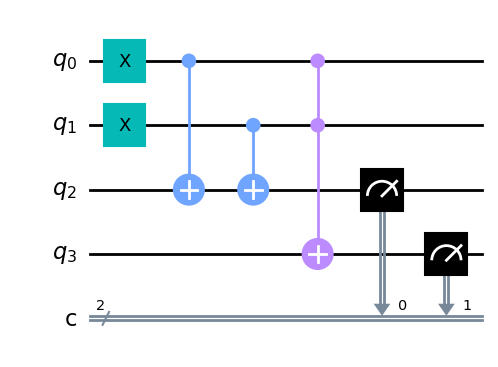

In [7]:
from qiskit import QuantumCircuit
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
test_qc.x(0)
test_qc.x(1)

# Next, it should carry out the adder circuit we created
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw()

In [8]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator() 
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()     # interpret the results as a “counts” dictionary

{'10': 1024}

{'01': 1024}


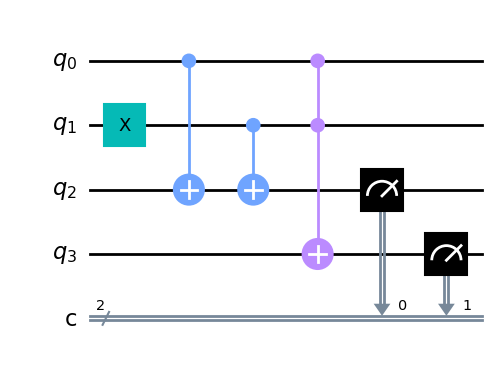

In [22]:
from qiskit import QuantumCircuit
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
#test_qc.x(0)
test_qc.x(1)

# Next, it should carry out the adder circuit we created
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw()
from qiskit.providers.aer import AerSimulator
sim = AerSimulator() 
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
print(result.get_counts())
test_qc.draw()

{'01': 1024}


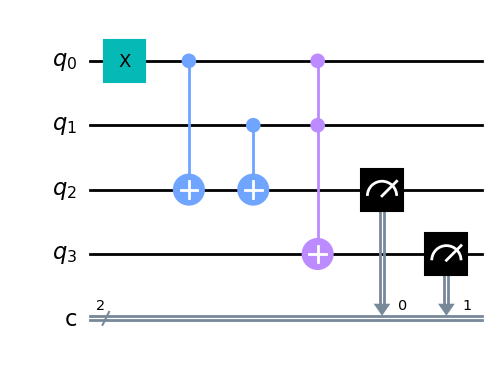

In [19]:
from qiskit import QuantumCircuit
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
test_qc.x(0)
# test_qc.x(1)

# Next, it should carry out the adder circuit we created
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
test_qc.measure(2,0)
test_qc.measure(3,1)
display(test_qc.draw())
from qiskit.providers.aer import AerSimulator
sim = AerSimulator() 
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
print(result.get_counts()) 


{'00': 1024}


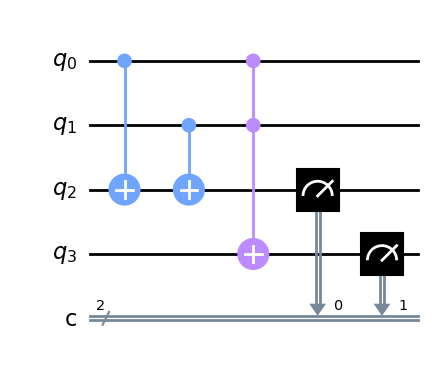

In [18]:
from qiskit import QuantumCircuit
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
# test_qc.x(0)
# test_qc.x(1)

# Next, it should carry out the adder circuit we created
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw()
from qiskit.providers.aer import AerSimulator
sim = AerSimulator() 
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
print(result.get_counts()) 
test_qc.draw()

### Below cells are for understanding behavior of Toffoli and CNOT gates by some small experiments on the adder circuit.

{'00': 1024}


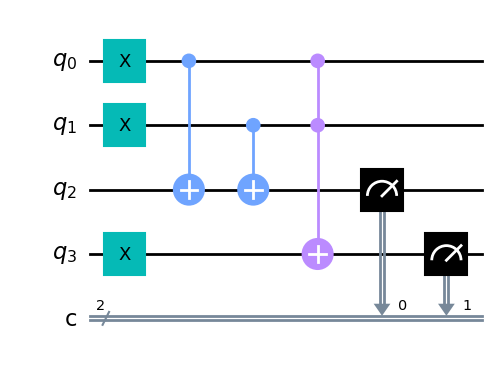

In [23]:
from qiskit import QuantumCircuit
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
test_qc.x(0)
test_qc.x(1)
test_qc.x(3)
# Next, it should carry out the adder circuit we created
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw()
from qiskit.providers.aer import AerSimulator
sim = AerSimulator() 
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
print(result.get_counts()) 
test_qc.draw()

This helped me resolve my confusion. I was confused that whether the Toffoli gate works like this-: 1. It is just the AND of the two control qubits outputted by the target qubit iff both the control qubits are 1. Otherwise if any of the control qubits are 0, then all the qubits are outputted unchanged. 2. Iff both control qubits are 1, then the NOT of the target qubit is outputted. Otherwise, everything stays unchanged. It turns out from the above cell's output that the 2nd inference is correct, true to the "ccx" notation used for Toffoli gates- controlled- controlled- not gate. But then I wonder, why in the tutorial they have used the analogy with AND gate for Toffoli gates. Infact, Toffolo gates function as proper AND gates (AND of the two control qubits) only if the 3rd qubit is intially inputted as 0.
## I will update this cell when I figure out. Till then I will keep this cell marked in bold letters.

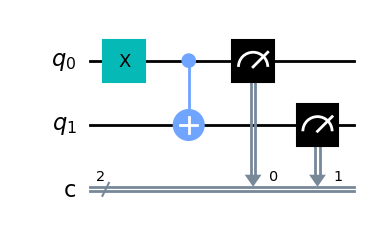

Result:  {'11': 1024}


In [24]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw())     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

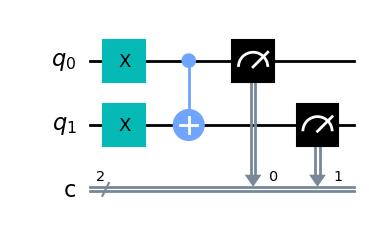

Result:  {'01': 1024}


In [26]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.x(1)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw())     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

In [ ]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(1)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw())     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

These 2 cells clear another confusion-: how CNOT gates work. They are indeed XOR gate equivalents. Their basic modus operandi is that if control qubit is 1, then target qubit gets inverted and conversely, both qubits stay same if control qubit is 0. This operation results in A XOR B getting outputted at target qubit output while control qubit always stays the same.This is also interpretable from the digital logic expression for XOR that is-: A XOR B= A'B+ AB'
## CNOT Doubt Cleared